In [1]:
####### Import all necessity functions ########
import os
import cv2
import random 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout, Conv2D, MaxPool2D, MaxPool3D, Flatten
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, Huber
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam

In [2]:
######## import all necessity functions ##########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, silhouette_score, confusion_matrix

In [3]:
####### To access the Google Drive ########
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
####### To Unzip the folder #######
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN Dataset/COVID_IEEE.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
####### To Extract the image to the data #########
directory = '/content/COVID_IEEE'
#now we want to extract the cat and dog folder
data, categories = [], ['covid', 'normal', 'virus']

for i in categories:
    
    folder_path = os.path.join(directory,i)
    
    for image in os.listdir(folder_path):
        label = categories.index(i)
        filepath_ = os.path.join(folder_path, image)
        img_arr_  = cv2.imread(filepath_)
        img_arr_  = cv2.resize(img_arr_, (100, 100))
        data.append([img_arr_, label])
    
    print(f"{i} is done.")

random.shuffle(data)

covid is done.
normal is done.
virus is done.


In [6]:
####### Split the dataset into X and y ########
X = []
y = []
for value_ in data:
  X.append(value_[0])
  y.append(value_[1])

print("appending is done.")

appending is done.


In [7]:
####### Normalized the X and y ########
X = np.array(X)
y = np.array(y)
####### Divided the data by 255 #######
X = X/255

In [8]:
####### Train and test split ########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1458, 100, 100, 3), (365, 100, 100, 3), (1458,), (365,))

In [9]:
####### Create a model #######
model = Sequential()

####### Create first Convolution layer with filters 128 and MaxPooling 2, 2 #######
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = "he_normal", input_shape = X.shape[1:]))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.6))

####### Create second Convolution layer with filters 64 and MaxPooling 2, 2 ######
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', kernel_initializer = "he_normal"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.7))

####### Faltten the model ########
model.add(Flatten())

####### Create first hidden layer with neurons 128 ########
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = HeNormal()))
model.add(Dropout(0.7))
model.add(BatchNormalization())

####### Create second hidden layer with 32 neurons #######
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = HeNormal()))
model.add(Dropout(0.6))
model.add(BatchNormalization())


####### Create an output layer ########
model.add(Dense(units = 3, activation = 'softmax'))


####### Compile the model #######
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

###### fit the model and run #######
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 150, batch_size = 128, verbose = 1)

Epoch 1/150
12/12 [==============================] - 4s 119ms/step - loss: 1.4458 - accuracy: 0.4060 - val_loss: 0.6647 - val_accuracy: 0.7041
Epoch 2/150
12/12 [==============================] - 1s 61ms/step - loss: 1.3415 - accuracy: 0.4156 - val_loss: 0.6280 - val_accuracy: 0.7370
Epoch 3/150
12/12 [==============================] - 1s 61ms/step - loss: 1.1529 - accuracy: 0.5007 - val_loss: 0.7350 - val_accuracy: 0.6027
Epoch 4/150
12/12 [==============================] - 1s 60ms/step - loss: 1.1218 - accuracy: 0.5144 - val_loss: 0.7675 - val_accuracy: 0.5890
Epoch 5/150
12/12 [==============================] - 1s 61ms/step - loss: 1.0612 - accuracy: 0.5103 - val_loss: 0.6432 - val_accuracy: 0.7260
Epoch 6/150
12/12 [==============================] - 1s 60ms/step - loss: 0.9466 - accuracy: 0.5775 - val_loss: 0.6816 - val_accuracy: 0.7425
Epoch 7/150
12/12 [==============================] - 1s 60ms/step - loss: 0.9285 - accuracy: 0.5700 - val_loss: 0.6511 - val_accuracy: 0.7479
Epoch

In [11]:
####### Print the model performance ########
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)
###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'micro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'micro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'micro'))

accuracy is   =  0.958904109589041
recall is     =  0.958904109589041
precision is  =  0.958904109589041
f1 score is   =  0.958904109589041


KFold Cross Validation 


In [12]:
def model_(X_train, X_test, y_train, y_test):
  ####### Create a model #######
  model = Sequential()

  ####### Create first Convolution layer with filters 128 and MaxPooling 2, 2 #######
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = "he_normal", input_shape = X.shape[1:]))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(0.6))

  ####### Create second Convolution layer with filters 64 and MaxPooling 2, 2 ######
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', kernel_initializer = "he_normal"))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(0.7))

  ####### Faltten the model ########
  model.add(Flatten())

  ####### Create first hidden layer with neurons 128 ########
  model.add(Dense(units = 128, activation = 'relu', kernel_initializer = HeNormal()))
  model.add(Dropout(0.7))
  model.add(BatchNormalization())

  ####### Create second hidden layer with 32 neurons #######
  model.add(Dense(units = 32, activation = 'relu', kernel_initializer = HeNormal()))
  model.add(Dropout(0.6))
  model.add(BatchNormalization())


  ####### Create an output layer ########
  model.add(Dense(units = 3, activation = 'softmax'))


  ####### Compile the model #######
  model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

  ###### fit the model and run #######
  model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 150, batch_size = 128, verbose = 1)
  
  return model

Kfold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_, accuracy_, recall_, precision_, f1_score_ = 1, [], [], [], []

for train_index_, test_index_ in Kfold_.split(X):
  print(f"Cross Validation {count_} is running.\n\n")
  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  model = model_(X_train, X_test, y_train, y_test)
  
  ####### Print the model performance ########
  y_pred = model.predict(X_test)
  y_pred_bool = np.argmax(y_pred, axis = 1)
  ###### print accuracy, reacll, precision and f1_score ########
  print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
  print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'micro'))
  print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'micro'))
  print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'micro'))

  accuracy_.append(accuracy_score(y_pred_bool, y_test))
  recall_.append(recall_score(y_pred_bool, y_test, average = 'micro'))
  precision_.append(precision_score(y_pred_bool, y_test, average = 'micro'))
  f1_score_.append(f1_score(y_pred_bool, y_test, average = 'micro'))

  ####### Increament value by 1 #######
  count_+= 1

Cross Validation 1 is running.


Epoch 1/150
13/13 [==============================] - 2s 98ms/step - loss: 1.4042 - accuracy: 0.3811 - val_loss: 0.8166 - val_accuracy: 0.6230
Epoch 2/150
13/13 [==============================] - 1s 60ms/step - loss: 1.2109 - accuracy: 0.4311 - val_loss: 0.7646 - val_accuracy: 0.7377
Epoch 3/150
13/13 [==============================] - 1s 59ms/step - loss: 1.0709 - accuracy: 0.4854 - val_loss: 0.7325 - val_accuracy: 0.7377
Epoch 4/150
13/13 [==============================] - 1s 60ms/step - loss: 1.0120 - accuracy: 0.5098 - val_loss: 0.6930 - val_accuracy: 0.7377
Epoch 5/150
13/13 [==============================] - 1s 60ms/step - loss: 0.9477 - accuracy: 0.5244 - val_loss: 0.7679 - val_accuracy: 0.8197
Epoch 6/150
13/13 [==============================] - 1s 60ms/step - loss: 0.9007 - accuracy: 0.5634 - val_loss: 0.7298 - val_accuracy: 0.8142
Epoch 7/150
13/13 [==============================] - 1s 60ms/step - loss: 0.8382 - accuracy: 0.5866 - val_loss: 0.8

In [13]:
print("accuracy score is  = ", np.array(accuracy_).mean())
print("reacll score is    = ", np.array(recall_).mean())
print("precision score is = ", np.array(precision_).mean())
print("f1_score score is  = ", np.array(f1_score_).mean())

accuracy score is  =  0.9539272203206629
reacll score is    =  0.9539272203206629
precision score is =  0.9539272203206629
f1_score score is  =  0.9539272203206629


covid IMAGES.



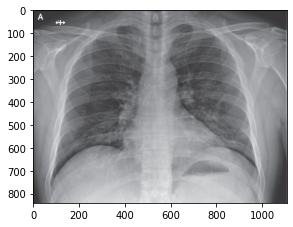

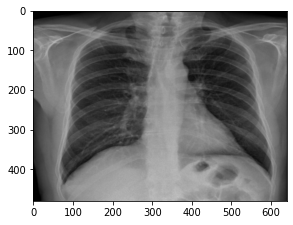

normal IMAGES.



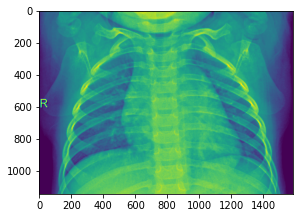

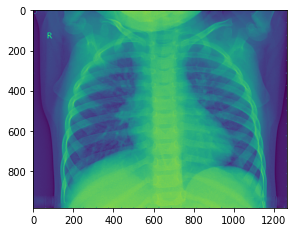

virus IMAGES.



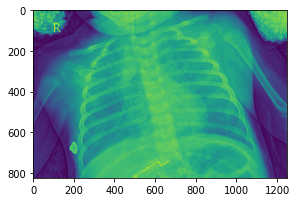

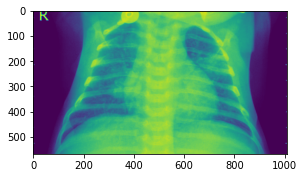

In [39]:
category_ = ['covid', 'normal', 'virus']
for i in category_:
  folderPath_= os.path.join('/content/COVID_IEEE', i)
  print(f"{i} IMAGES.\n")
  count_ = 0
  for image_ in os.listdir(folderPath_):
    if count_ < 2:
      plt.figure(figsize = (10, 12))
      plt.subplot(2, 2, 4)
      filePath_ = os.path.join(folderPath_, image_)
      f = plt.imread(filePath_)
      plt.imshow(f)
      count_+= 1
      plt.show()
    else:
      pass

In [48]:
target_ = pd.DataFrame(y_test, columns = ['Target Value'])
y_pred  = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)
predicted_  = pd.DataFrame(y_pred_bool, columns = ['Predicted Value'])
comparison_ = pd.concat([target_, predicted_], axis = 1)
comparison_.sample(10)

,Target Value,Predicted Value
38,1,1
10,1,1
35,1,1
85,1,1
156,2,2
22,1,1
54,0,0
173,0,0
175,2,2
180,2,2
